In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import pandas_profiling as pandas_profiling
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/candy-data.csv')
df.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


# **Exploratory** **Data** **Analysis**(**EDA**)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


#info function gives us the following insights into the df dataframe:

There are a total of 85 samples (rows) and 13 columns in the dataframe.

There are 12 columns with a numeric datatype and 1 columns with an object datatype.

There are no missing values in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

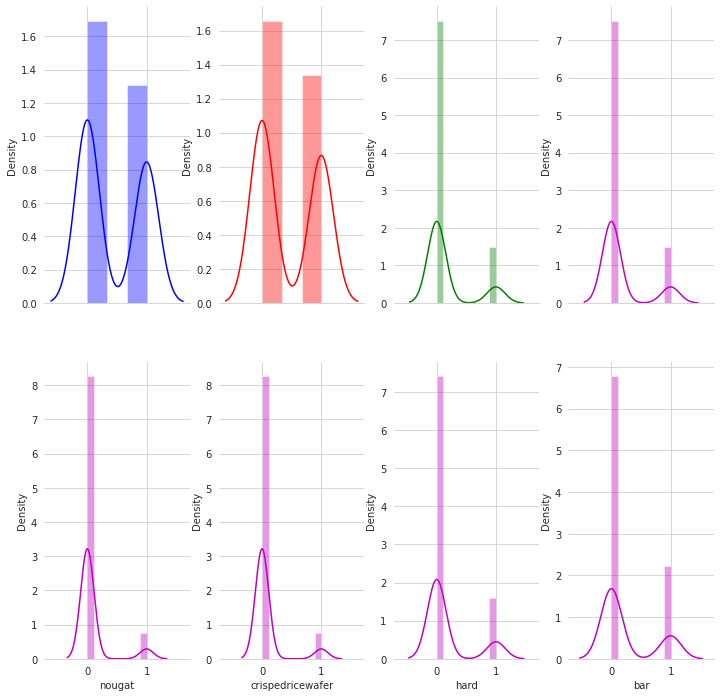

In [47]:
f, axes = plt.subplots(2, 4, figsize=(12, 12), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

#sns.distplot(df.winpercent, color="b", ax=axes[0, 0])

sns.distplot(df.chocolate, color="b", ax=axes[0, 0])

sns.distplot(df.fruity, color="r", ax=axes[0, 1])

sns.distplot(df.caramel, color="g", ax=axes[0, 2])

sns.distplot(df.peanutyalmondy, color="m", ax=axes[0, 3])

sns.distplot(df.nougat, color="m", ax=axes[1, 0])

sns.distplot(df.crispedricewafer, color="m", ax=axes[1, 1])

sns.distplot(df.hard, color="m", ax=axes[1, 2])

sns.distplot(df.bar, color="m", ax=axes[1, 3])


In [6]:
df.describe(include='all')

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mr Good Bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,NaN,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998


In [7]:
df.sugarpercent = round(df.sugarpercent,3)
df.pricepercent = round(df.pricepercent,3)
df.winpercent = round(df.winpercent,3)
df.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.972
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.603
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.117
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.348
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.915
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.418
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.011
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.518


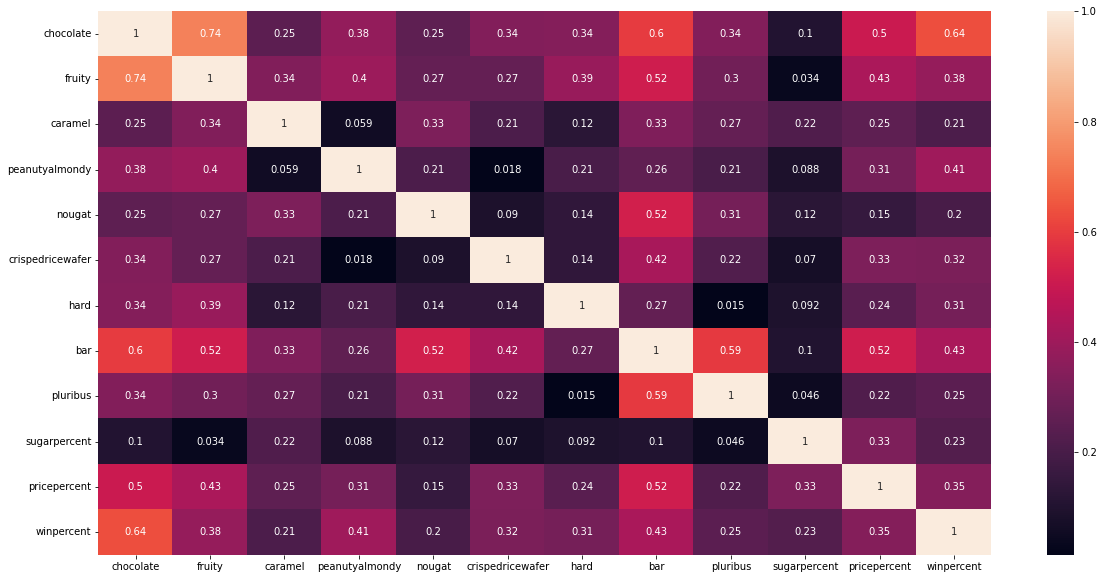

In [8]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)

Observation

•The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. 
 You can observe that the correlation between chocolate and Fruity is highest i.e. 0.7417 and then between Hard and pluribus is lowest i.e. 0.014.

•Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation.
 Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model building.


In [9]:
# prints a descending list of correlation pair (Max on top)
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)
display(corrank(df))


,Feature1,Feature2,corr
0,chocolate,fruity,0.741721
1,chocolate,winpercent,0.636517
2,chocolate,bar,0.597421
3,bar,pluribus,0.593409
4,nougat,bar,0.522976
...,...,...,...
61,caramel,peanutyalmondy,0.059356
62,pluribus,sugarpercent,0.045523
63,fruity,sugarpercent,0.034393
64,peanutyalmondy,crispedricewafer,0.017646


In [10]:
# prints a correlation matrix for analyzing the highest correlation.
cormat = df.corr()
round(cormat,2)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.00,-0.74,0.25,0.38,0.25,0.34,-0.34,0.60,-0.34,0.10,0.50,0.64
fruity,-0.74,1.00,-0.34,-0.40,-0.27,-0.27,0.39,-0.52,0.30,-0.03,-0.43,-0.38
caramel,0.25,-0.34,1.00,0.06,0.33,0.21,-0.12,0.33,-0.27,0.22,0.25,0.21
peanutyalmondy,0.38,-0.40,0.06,1.00,0.21,-0.02,-0.21,0.26,-0.21,0.09,0.31,0.41
nougat,0.25,-0.27,0.33,0.21,1.00,-0.09,-0.14,0.52,-0.31,0.12,0.15,0.20
crispedricewafer,0.34,-0.27,0.21,-0.02,-0.09,1.00,-0.14,0.42,-0.22,0.07,0.33,0.32
hard,-0.34,0.39,-0.12,-0.21,-0.14,-0.14,1.00,-0.27,0.01,0.09,-0.24,-0.31
bar,0.60,-0.52,0.33,0.26,0.52,0.42,-0.27,1.00,-0.59,0.10,0.52,0.43
pluribus,-0.34,0.30,-0.27,-0.21,-0.31,-0.22,0.01,-0.59,1.00,0.05,-0.22,-0.25
sugarpercent,0.10,-0.03,0.22,0.09,0.12,0.07,0.09,0.10,0.05,1.00,0.33,0.23


In [11]:
#winners = df[df.winpercent>df.winpercent.quantile(.6)]
winners = df.winpercent.quantile(.6)
winners1 = df.winpercent
print(winners)
print(winners1)
df.info()

53.557
0     66.972
1     67.603
2     32.261
3     46.117
4     52.341
       ...  
80    45.466
81    39.012
82    44.376
83    41.904
84    49.524
Name: winpercent, Length: 85, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float

In [12]:
feature_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent','pricepercent']                
X = df[feature_cols] 
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(85, 11)


In [13]:
y = df.winpercent
y.head()
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(85,)


In [14]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(df)
#df1 = scaler.transform(df)

from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)

In [15]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (59, 11)
y_train shape:  (59,)

Test cases as below
X_test shape:  (26, 11)
y_test shape:  (26,)


# **Linear** **Regression**

In [16]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
y_pred_test = linreg.predict(X_test)   
#RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))



In [17]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [18]:
#Linear Regression Model without GridSearchCV
X = df[feature_cols]
y = df.winpercent
linreg = linear_reg(X,y)

In [19]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 34.21276455278637
Coefficients: [17.72842833  5.87273201 -6.50360301  8.61041303  8.82232026 13.58983284
 -5.25821048 -4.47963889 -3.7989331  14.75144004 -1.67448917]


In [20]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_) 

In [21]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 34.21276455278637
chocolate 17.728428326077147
fruity 5.8727320131108165
caramel -6.503603014940534
peanutyalmondy 8.610413030326812
nougat 8.822320263523661
crispedricewafer 13.589832842499819
hard -5.258210480035312
bar -4.479638893627435
pluribus -3.7989330989163195
sugarpercent 14.751440038317398
pricepercent -1.6744891670242232


In [22]:
y_pred_train = linreg.predict(X_train) 

In [23]:
y_pred_test = linreg.predict(X_test)   

In [24]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [25]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 7.658338463375414
MAE for test set is 10.42580638395998


In [26]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [27]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 9.127864274856437
RMSE for test set is 13.280661984864604


In [28]:
feature_cols = ['chocolate', 'peanutyalmondy', 'bar']                                                        # create a Python list of feature names
X = df[feature_cols]  
y = df.winpercent
linreg=linear_reg(X,y,gridsearch=True)

Mean cross-validated score of the best_estimator :  0.08486650018552502
RMSE for the test set is 11.783890323269436


# **Decision** **Tree**

In [29]:
from sklearn import tree
model_dt = tree.DecisionTreeRegressor(random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [30]:
y_pred_train_dt = model_dt.predict(X_train) 
y_pred_test_dt = model_dt.predict(X_test) 

In [31]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_dt)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test_dt)

In [32]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.5609491525423727
MAE for test set is 9.72653846153846


In [33]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dt))

In [34]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.691752821829918
RMSE for test set is 11.722355546463017


# **Random** **Forest**

In [35]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state = 0)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [36]:
y_pred_train_rf = model_rf.predict(X_train) 
y_pred_test_rf = model_rf.predict(X_test) 

In [37]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_rf)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test_rf)

In [38]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 3.7581176436642503
MAE for test set is 9.76574909157509


In [39]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_rf))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rf))

In [40]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 4.564781804119814
RMSE for test set is 12.276038722130856


**KNN(K-Nearest-Neighbour)**

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fitting the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_test, y_pred)
cm

182.1487438675213

In [43]:
from sklearn.metrics import mean_squared_error
cm = np.sqrt(mean_squared_error(y_test, y_pred))
cm

13.49624925182998

In [44]:
#Using cross-validation for parameter tuning

k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

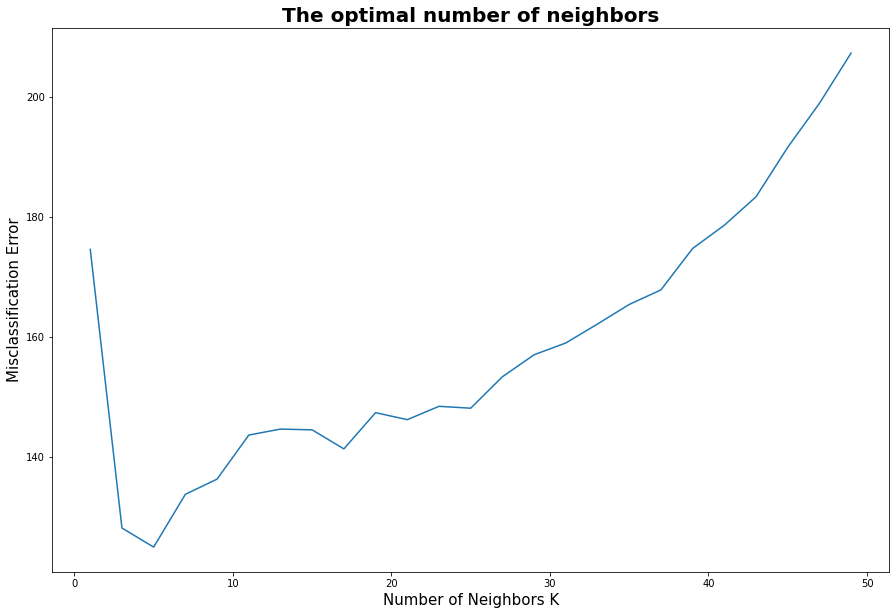

In [45]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [46]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 5.
